In [1]:
!pip install rudalle==1.0.0
!pip install ruclip==0.0.1rc7
!pip install translators==4.9.5

     |████████████████████████████████| 41 kB 179 kB/s 
     |████████████████████████████████| 4.4 MB 8.3 MB/s 
     |████████████████████████████████| 66 kB 4.1 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 2.8 MB 35.8 MB/s 
     |████████████████████████████████| 1.7 MB 34.5 MB/s 
     |████████████████████████████████| 60.3 MB 1.4 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 244 kB 46.7 MB/s 
     |████████████████████████████████| 527 kB 45.6 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 112 kB 44.4 MB/s 
     |████████████████████████████████| 133 kB 42.9 MB/s 
     |████████████████████████████████| 397 kB 40.4 MB/s 
     |████████████████████████████████| 829 kB 47.5 MB/s 
     |████████████████████████████████| 952 kB 47.6 MB/s 
     |███████████████████

     |████████████████████████████████| 61 kB 433 kB/s 
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.4.0
    Uninstalling huggingface-hub-0.4.0:
      Successfully uninstalled huggingface-hub-0.4.0
     |████████████████████████████████| 81 kB 4.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 32.0 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14598 sha256=130e0a6140ca0ec04edece120e1a243b7881c6ebae6122e38d81a2af0687bd28
  Stored in directory: /root/.cache/pip/wheels/9a/ee/03/da5c0b4a8c13362beeb844eb913bbe58a89bde1de2b9157007
Successfully built PyExecJS
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall

In [2]:
import translators
import ruclip

from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_ruclip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan
from rudalle.utils import seed_everything

Using United States server backend.


In [3]:
device = 'cuda'
dalle = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)

Downloading:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


In [4]:
max_memory = 6.0

if max_memory < 4.5:
  bs = 1
elif max_memory < 5.5:
  bs = 2
elif max_memory < 6.5:
  bs = 3
elif max_memory < 7.5:
  bs = 4
elif max_memory < 8.5:
  bs = 5
elif max_memory < 9.5:
  bs = 6
elif max_memory < 10.5:
  bs = 7
else:
  bs = 8

In [5]:
realesrgan = get_realesrgan('x2', device=device)
tokenizer = get_tokenizer()
vae = get_vae(dwt=True).to(device)
clip, processor = ruclip.load('ruclip-vit-base-patch32-384')
clip_predictor = ruclip.Predictor(clip, processor, device, bs=bs)

Downloading:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

x2 --> ready


Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/276M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/748k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/606M [00:00<?, ?B/s]

In [6]:
# detect language
def detect_lang(text):
  if len(set('абвгдежзийклмнопрстуфхцчшщъыьэюяё').intersection(text.lower())) > 0:
    return 'ru'
  if len(set('abcdefghijklmnopqrstuvwxyz').intersection(text.lower())) > 0:
    return 'en'
  return 'other'

In [10]:
text = input()

if detect_lang(text) == 'en':
  text = translators.google(text, from_language='en', to_language='ru')
elif detect_lang(text) == 'other':
  text = translators.google(text, from_language='th', to_language='ru')

print('Russian text : ', text)

seed_everything(35)

pil_images = []
ppl_scores = []

for top_k, top_p, images_num in [(2048, 0.995, 24), ]:
  _pil_images, _ppl_scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p, bs=bs)
  pil_images += _pil_images
  ppl_scores += _ppl_scores

свинья носит наручные часы
Russian text :  свинья носит наручные часы


  0%|          | 0/1024 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:89: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

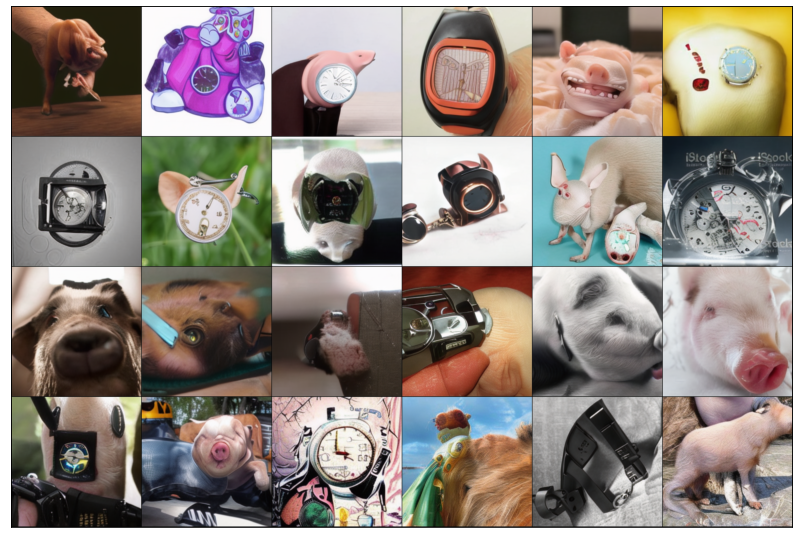

In [11]:
show(pil_images, 6)

In [12]:
top_images, clip_scores = cherry_pick_by_ruclip(pil_images, text, clip_predictor, count=6)

24it [00:00, 26.54it/s]


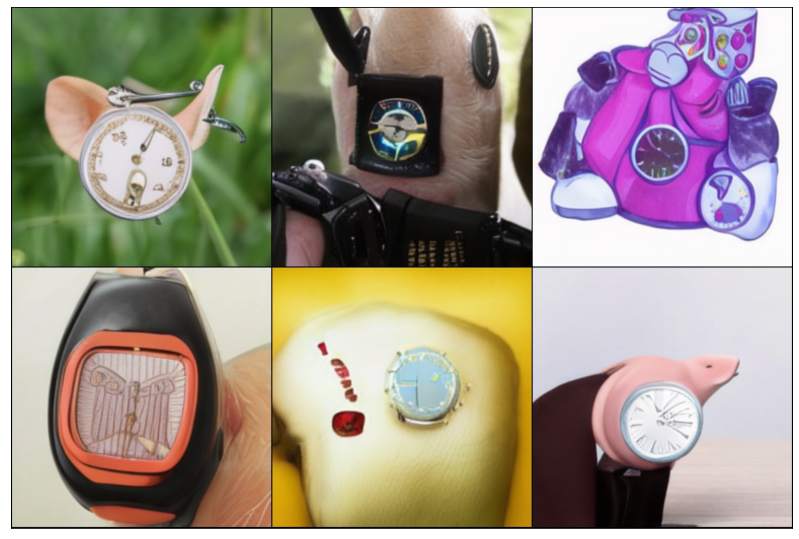

In [13]:
show(top_images, 3)

In [14]:
sr_images = super_resolution(top_images, realesrgan)

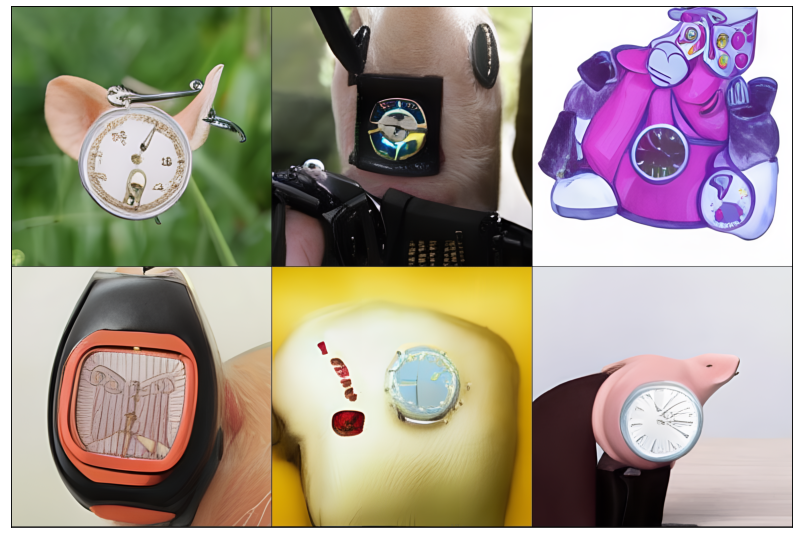

In [15]:
show(sr_images, 3)